# Tak Player Bot Project
## Experiments Results Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
path = "./experiments/results"

### Random Policy Results

In [74]:
df_random_eff_runs = pd.read_csv(f"{path}/random_eff_run_7.csv")
df_random_eff_runs

,board_size,epsilon,trial_number,steps,reward_for_white_player,reward_for_black_player
0,3,1.0,0,34,0,0
1,3,1.0,1,15,0,0
2,3,1.0,2,14,0,10
3,3,1.0,3,16,0,10
4,3,1.0,4,21,10,0
...,...,...,...,...,...,...
29995,5,1.0,9995,54,0,26
29996,5,1.0,9996,76,0,0
29997,5,1.0,9997,68,0,0
29998,5,1.0,9998,57,26,0


In [21]:
df_random_eff_runs_b3 = df_random_eff_runs[df_random_eff_runs["board_size"] == 3]
df_random_eff_runs_b3 = df_random_eff_runs_b3.drop("board_size", axis=1)
df_random_eff_runs_b3 = df_random_eff_runs_b3.drop("epsilon", axis=1)
df_random_eff_runs_b3

,trial_number,steps,reward_for_white_player,reward_for_black_player
0,0,34,0,0
1,1,15,0,0
2,2,14,0,10
3,3,16,0,10
4,4,21,10,0
...,...,...,...,...
9995,9995,20,0,0
9996,9996,17,0,0
9997,9997,21,10,0
9998,9998,20,0,10


In [22]:
df_random_eff_runs_b4 = df_random_eff_runs[df_random_eff_runs["board_size"] == 4]
df_random_eff_runs_b4 = df_random_eff_runs_b4.drop("board_size", axis=1)
df_random_eff_runs_b4 = df_random_eff_runs_b4.drop("epsilon", axis=1)
df_random_eff_runs_b4

,trial_number,steps,reward_for_white_player,reward_for_black_player
10000,0,44,0,0
10001,1,57,17,0
10002,2,42,0,0
10003,3,28,0,17
10004,4,42,0,17
...,...,...,...,...
19995,9995,35,0,0
19996,9996,29,0,0
19997,9997,70,0,0
19998,9998,54,0,0


In [23]:
df_random_eff_runs_b5 = df_random_eff_runs[df_random_eff_runs["board_size"] == 5]
df_random_eff_runs_b5 = df_random_eff_runs_b5.drop("board_size", axis=1)
df_random_eff_runs_b5 = df_random_eff_runs_b5.drop("epsilon", axis=1)
df_random_eff_runs_b5

,trial_number,steps,reward_for_white_player,reward_for_black_player
20000,0,84,0,26
20001,1,50,0,26
20002,2,52,0,0
20003,3,57,26,0
20004,4,67,0,0
...,...,...,...,...
29995,9995,54,0,26
29996,9996,76,0,0
29997,9997,68,0,0
29998,9998,57,26,0


In [41]:
b3_white_wins = sum(df_random_eff_runs_b3["reward_for_white_player"] > 0)
b3_black_wins = sum(df_random_eff_runs_b3["reward_for_black_player"] > 0)
b3_ties = 10000 - b3_white_wins - b3_black_wins

In [42]:
b4_white_wins = sum(df_random_eff_runs_b4["reward_for_white_player"] > 0)
b4_black_wins = sum(df_random_eff_runs_b4["reward_for_black_player"] > 0)
b4_ties = 10000 - b4_white_wins - b4_black_wins

In [43]:
b5_white_wins = sum(df_random_eff_runs_b5["reward_for_white_player"] > 0)
b5_black_wins = sum(df_random_eff_runs_b5["reward_for_black_player"] > 0)
b5_ties = 10000 - b5_white_wins - b5_black_wins

In [46]:
all_white_wins = np.array((b3_white_wins, b4_white_wins, b5_white_wins))
all_black_wins = np.array((b3_black_wins, b4_black_wins, b5_black_wins))
all_ties = np.array((b3_ties, b4_ties, b5_ties))

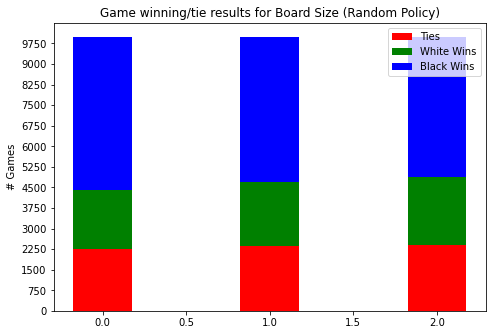

In [69]:
width = 0.35
ind = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, all_white_wins, width, color='r')
ax.bar(ind, all_black_wins, width, bottom=all_white_wins, color='g')
ax.bar(ind, all_ties, width, bottom=all_white_wins+all_black_wins, color='b')
ax.set_ylabel('# Games')
ax.set_title('Game winning/tie results for Board Size (Random Policy)')
# ax.set_xticks(ind, ('3x3', '4x4', '5x5'))
ax.set_yticks(np.arange(0, 10001, 750))
ax.legend(labels=['Ties', 'White Wins', 'Black Wins'])
plt.savefig("plot_random_policy_game_results.png", bbox_inches='tight')
plt.show()

### MCTS Results

In [75]:
df_mcts_vs_rand_runs = pd.read_csv(f"{path}/mcts_vs_randeff_run_3.csv")
df_mcts_vs_rand_runs = df_mcts_vs_rand_runs.drop("board_size", axis=1)
df_mcts_vs_rand_runs = df_mcts_vs_rand_runs.drop("mcts_expansion_depth", axis=1)
df_mcts_vs_rand_runs = df_mcts_vs_rand_runs.drop("mcts_iterations", axis=1)
df_mcts_vs_rand_runs

,mcts_expansion_epsilon,rollout_runs,trial_number,steps,reward_for_white_player,reward_for_black_player
0,0.9,1,0,16,0,0
1,0.9,1,1,10,0,0
2,0.9,1,2,14,0,10
3,0.9,1,3,13,10,0
4,0.9,1,4,17,10,0
...,...,...,...,...,...,...
595,1.0,32,95,12,0,0
596,1.0,32,96,12,0,0
597,1.0,32,97,17,10,0
598,1.0,32,98,10,0,0


In [81]:
df_mcts_vs_rand_runs_eps1 = df_mcts_vs_rand_runs[df_mcts_vs_rand_runs["mcts_expansion_epsilon"] == 1]
df_mcts_vs_rand_runs_eps1_rr01 = df_mcts_vs_rand_runs_eps1[df_mcts_vs_rand_runs_eps1["rollout_runs"] == 1]
df_mcts_vs_rand_runs_eps1_rr08 = df_mcts_vs_rand_runs_eps1[df_mcts_vs_rand_runs_eps1["rollout_runs"] == 8]
df_mcts_vs_rand_runs_eps1_rr32 = df_mcts_vs_rand_runs_eps1[df_mcts_vs_rand_runs_eps1["rollout_runs"] == 32]

In [82]:
df_mcts_vs_rand_runs_eps09 = df_mcts_vs_rand_runs[df_mcts_vs_rand_runs["mcts_expansion_epsilon"] == 0.9]
df_mcts_vs_rand_runs_eps09_rr01 = df_mcts_vs_rand_runs_eps09[df_mcts_vs_rand_runs_eps09["rollout_runs"] == 1]
df_mcts_vs_rand_runs_eps09_rr08 = df_mcts_vs_rand_runs_eps09[df_mcts_vs_rand_runs_eps09["rollout_runs"] == 8]
df_mcts_vs_rand_runs_eps09_rr32 = df_mcts_vs_rand_runs_eps09[df_mcts_vs_rand_runs_eps09["rollout_runs"] == 32]

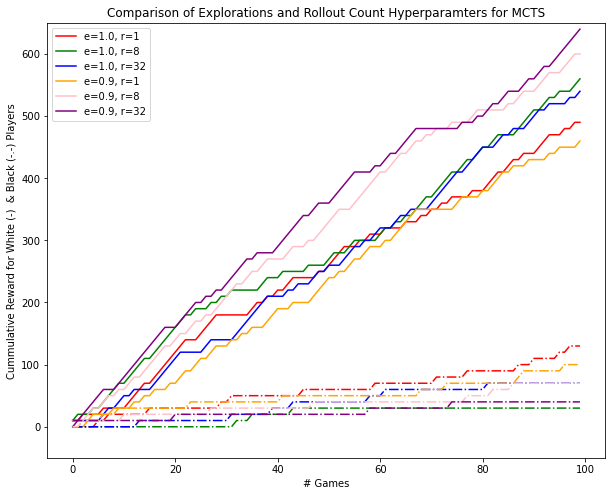

In [119]:
plt.figure(figsize=(10, 8))

x = np.arange(0, 100, 1)
y = np.cumsum(df_mcts_vs_rand_runs_eps1_rr01["reward_for_white_player"])
plt.plot(x, y, label="e=1.0, r=1", color="r")
y = np.cumsum(df_mcts_vs_rand_runs_eps1_rr08["reward_for_white_player"])
plt.plot(x, y, label="e=1.0, r=8", color="g")
y = np.cumsum(df_mcts_vs_rand_runs_eps1_rr32["reward_for_white_player"])
plt.plot(x, y, label="e=1.0, r=32", color="b")
y = np.cumsum(df_mcts_vs_rand_runs_eps09_rr01["reward_for_white_player"])
plt.plot(x, y, label="e=0.9, r=1", color="orange")
y = np.cumsum(df_mcts_vs_rand_runs_eps09_rr08["reward_for_white_player"])
plt.plot(x, y, label="e=0.9, r=8", color="pink")
y = np.cumsum(df_mcts_vs_rand_runs_eps09_rr32["reward_for_white_player"])
plt.plot(x, y, label="e=0.9, r=32", color="purple")

y = np.cumsum(df_mcts_vs_rand_runs_eps1_rr01["reward_for_black_player"])
plt.plot(x, y, linestyle="-.", color="r")
y = np.cumsum(df_mcts_vs_rand_runs_eps1_rr08["reward_for_black_player"])
plt.plot(x, y, linestyle="-.", color="g")
y = np.cumsum(df_mcts_vs_rand_runs_eps1_rr32["reward_for_black_player"])
plt.plot(x, y, linestyle="-.", color="b")
y = np.cumsum(df_mcts_vs_rand_runs_eps09_rr01["reward_for_black_player"])
plt.plot(x, y, linestyle="-.", color="orange")
y = np.cumsum(df_mcts_vs_rand_runs_eps09_rr08["reward_for_black_player"])
plt.plot(x, y, linestyle="-.", color="pink")
y = np.cumsum(df_mcts_vs_rand_runs_eps09_rr32["reward_for_black_player"])
plt.plot(x, y, linestyle="-.", color="purple")

plt.legend()
plt.xlabel("# Games")
plt.ylabel("Cummulative Reward for White (-)  & Black (-.-) Players")
plt.ylim([-50, 650])
plt.title("Comparison of Explorations and Rollout Count Hyperparamters for MCTS")
plt.savefig("plot_mcts_vs_random.png", bbox_inches='tight')
plt.show()

In [127]:
mcts_vs_rand_eps09_rr01_white_wins = sum(df_mcts_vs_rand_runs_eps09_rr32["reward_for_white_player"] > 0)
mcts_vs_rand_eps09_rr01_black_wins = sum(df_mcts_vs_rand_runs_eps09_rr32["reward_for_black_player"] > 0)
mcts_vs_rand_eps09_rr01_ties = 10000 - mcts_vs_rand_eps09_rr01_white_wins - mcts_vs_rand_eps09_rr01_black_wins
print(mcts_vs_rand_eps09_rr01_white_wins, mcts_vs_rand_eps09_rr01_black_wins, mcts_vs_rand_eps09_rr01_ties)

64 4 9932


# MCTS vs MCTS

In [130]:
df_mcts_vs_mcts = pd.read_csv(f"{path}/mcts2_run_3.csv")
df_mcts_vs_mcts = df_mcts_vs_mcts.drop("board_size", axis=1)
df_mcts_vs_mcts = df_mcts_vs_mcts.drop("mcts_expansion_depth", axis=1)
df_mcts_vs_mcts = df_mcts_vs_mcts.drop("mcts_expansion_epsilon", axis=1)
df_mcts_vs_mcts = df_mcts_vs_mcts.drop("mcts_iterations", axis=1)
df_mcts_vs_mcts = df_mcts_vs_mcts.drop("rollout_runs", axis=1)
df_mcts_vs_mcts

,starting_player,trial_number,steps,reward_for_white_player,reward_for_black_player
0,white,0,24,0,0
1,white,1,25,10,0
2,white,2,17,10,0
3,white,3,13,10,0
4,white,4,17,10,0
...,...,...,...,...,...
95,black,45,16,10,0
96,black,46,16,10,0
97,black,47,16,10,0
98,black,48,6,10,0


In [133]:
df_mcts_vs_mcts_init_white = df_mcts_vs_mcts[df_mcts_vs_mcts["starting_player"] == "white"]
df_mcts_vs_mcts_init_white = df_mcts_vs_mcts_init_white.drop("starting_player", axis=1)
df_mcts_vs_mcts_init_white

,trial_number,steps,reward_for_white_player,reward_for_black_player
0,0,24,0,0
1,1,25,10,0
2,2,17,10,0
3,3,13,10,0
4,4,17,10,0
5,5,18,0,0
6,6,10,0,0
7,7,11,10,0
8,8,15,10,0
9,9,17,10,0


In [134]:
df_mcts_vs_mcts_init_black = df_mcts_vs_mcts[df_mcts_vs_mcts["starting_player"] == "black"]
df_mcts_vs_mcts_init_black = df_mcts_vs_mcts_init_black.drop("starting_player", axis=1)
df_mcts_vs_mcts_init_black

,trial_number,steps,reward_for_white_player,reward_for_black_player
50,0,16,10,0
51,1,24,10,0
52,2,11,0,0
53,3,15,0,0
54,4,10,10,0
55,5,15,0,0
56,6,14,10,0
57,7,22,10,0
58,8,13,0,0
59,9,20,10,0


In [141]:
mcts_vs_mcts_init_black_white_wins = sum(df_mcts_vs_mcts_init_black["reward_for_white_player"] > 0)
mcts_vs_mcts_init_black_black_wins = sum(df_mcts_vs_mcts_init_black["reward_for_black_player"] > 0)
mcts_vs_mcts_init_black_ties = 100 - mcts_vs_mcts_init_black_white_wins - mcts_vs_mcts_init_black_black_wins
print(mcts_vs_mcts_init_black_white_wins, mcts_vs_mcts_init_black_black_wins, mcts_vs_mcts_init_black_ties)

29 0 71


In [142]:
mcts_vs_mcts_init_white_white_wins = sum(df_mcts_vs_mcts_init_white["reward_for_white_player"] > 0)
mcts_vs_mcts_init_white_black_wins = sum(df_mcts_vs_mcts_init_white["reward_for_black_player"] > 0)
mcts_vs_mcts_init_white_ties = 100 - mcts_vs_mcts_init_white_white_wins - mcts_vs_mcts_init_white_black_wins
print(mcts_vs_mcts_init_white_white_wins, mcts_vs_mcts_init_white_black_wins, mcts_vs_mcts_init_white_ties)

38 0 62


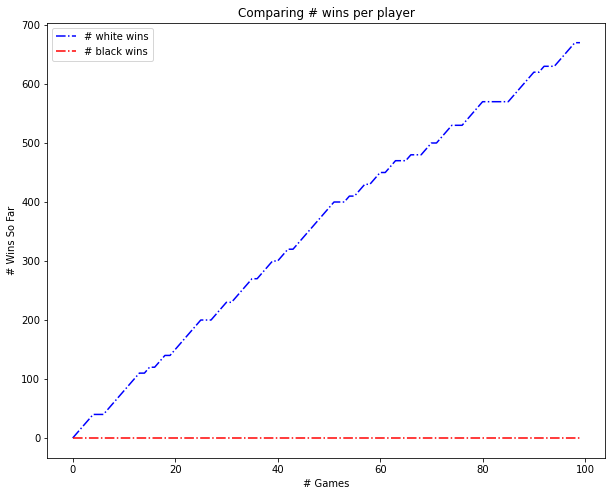

In [140]:
plt.figure(figsize=(10, 8))

x = np.arange(0, 100, 1)
y = np.cumsum(df_mcts_vs_mcts_b4["reward_for_white_player"])
plt.plot(x, y, linestyle="-.", color="blue", label="# white wins")
y = np.cumsum(df_mcts_vs_mcts_b4["reward_for_black_player"])
plt.plot(x, y, linestyle="-.", color="red", label="# black wins")

plt.legend()
plt.title("Comparing Rewards per player")
plt.xlabel("Cummulative ")
plt.ylabel("# Wins So Far")
plt.savefig("plot_compare_num_wins.png")
plt.show()